<a href="https://colab.research.google.com/github/Voland24/AndrewNgMCcourse/blob/main/Simple%26MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

file = 'ex1data.txt'
cols = np.loadtxt(file, delimiter = ',', usecols = (0,1), unpack = True )
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
X = np.insert(X,0,1,axis = 1)


[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]


Regression with one variable


Text(0.5, 0, 'Population of city in 10k people steps')

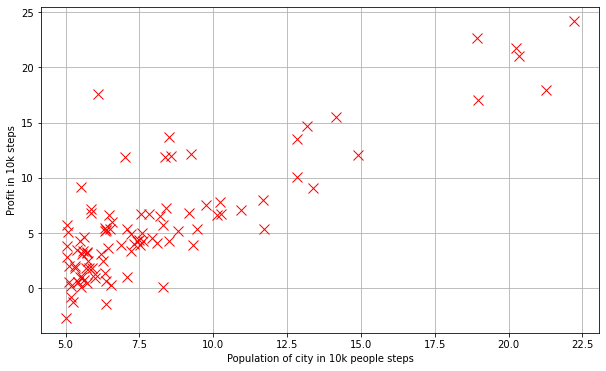

In [6]:
plt.figure(figsize = (10,6))
plt.plot(X[:,1], y[:,0], 'rx', markersize = 10)
plt.grid(True)
plt.ylabel('Profit in 10k steps')
plt.xlabel('Population of city in 10k people steps')

Gradient descent code

In [28]:
iterations = 1500
alpha = 0.01 #learning rate

#linear combination of inputs and coefficients
def hypothesis(theta, X):
  return np.dot(X, theta)

#cost function 
def cost_func(theta_guess, X, y):
  return float((1./(2*len(X)) * np.dot((hypothesis(theta_guess,X) - y).T, (hypothesis(theta_guess,X) - y))))

init_theta = np.zeros((X.shape[1],1))
#Initial cost is larges since all coeffs are 0, meaning we guess the origin as the hypothesis
cost_func(init_theta, X , y)

def gradientDescent(X, theta_start = np.zeros(2)):
    theta = theta_start
    cost_vector = [] #Used to plot cost as function of iteration
    theta_path = [] #Used to visualize the minimization path later on
    for _ in range(iterations):
        tmptheta = theta
        cost_vector.append(cost_func(theta,X,y))
        theta_path.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in range(len(tmptheta)):
          tmptheta[j] = theta[j] - (alpha/len(X))*np.sum((hypothesis(theta,X) - y)*np.array(X[:,j]).reshape(len(X),1))
        theta = tmptheta
    return theta, theta_path, cost_vector


init_theta = np.zeros((X.shape[1], 1))
theta, theta_history, cost_vector = gradientDescent(X, init_theta)

print(theta)

[[-3.63606348]
 [ 1.16698916]]


Plot the cost function


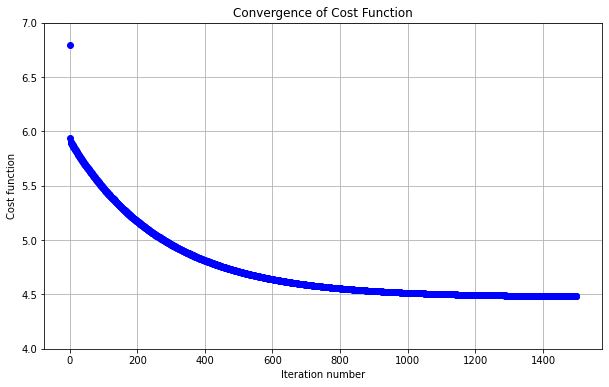

In [31]:
def plotCostConv(cost_vector):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(cost_vector)),cost_vector,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])  

plotCostConv(cost_vector)
dummy = plt.ylim([4,7])


Fit the line to data


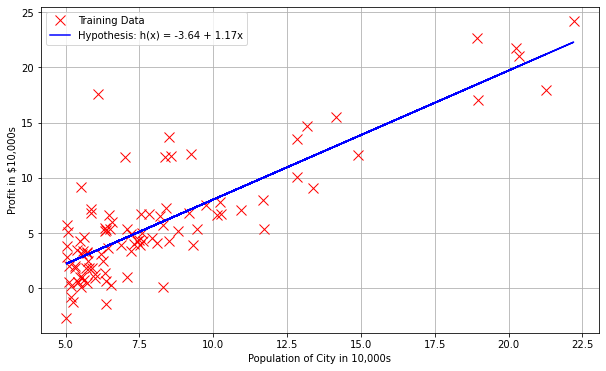

In [32]:
def fit(xval):
  return theta[0] + theta[1] * xval

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],fit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()


Multiple linear regression

In [38]:
file = 'ex2data.txt'
cols = np.loadtxt(file, delimiter = ',', usecols = (0,1,2), unpack = True)

X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))

X = np.insert(X, 0 , 1, axis = 1)


[3. 3. 3. 2. 4. 4. 3. 3. 3. 3. 4. 3. 3. 5. 3. 4. 2. 3. 4. 4. 3. 2. 3. 4.
 3. 3. 3. 3. 3. 3. 2. 1. 4. 3. 4. 3. 3. 4. 4. 4. 2. 3. 4. 3. 2. 4. 3.]


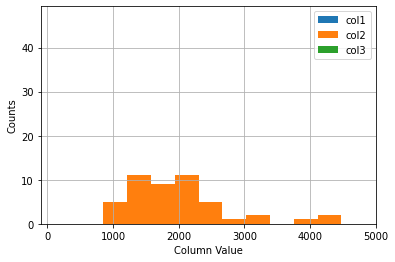

In [39]:
#See the data

plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')
dummy = plt.hist(X[:,2],label = 'col3')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

We can see that we need to normalize the features since cols2 values are that much larger than all the other ones

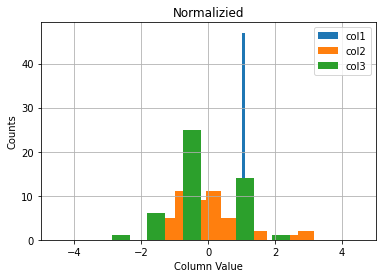

In [40]:
save_mean, save_std = [], []
Xcopy = X.copy()

for col in range(Xcopy.shape[1]):
  save_mean.append(np.mean(Xcopy[:,col]))
  save_std.append(np.std(Xcopy[:,col]))
  if col == 0:
    continue
  Xcopy[:,col] = ((Xcopy[:,col]) - save_mean[-1]) / save_std[-1]

plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xcopy[:,0],label = 'col1')
dummy = plt.hist(Xcopy[:,1],label = 'col2')
dummy = plt.hist(Xcopy[:,2],label = 'col3')
plt.title('Normalizied')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

Now we can run gradient descent on the dataset, if we did this before normalizing, we could get an overflow in calculation or inaccurate results


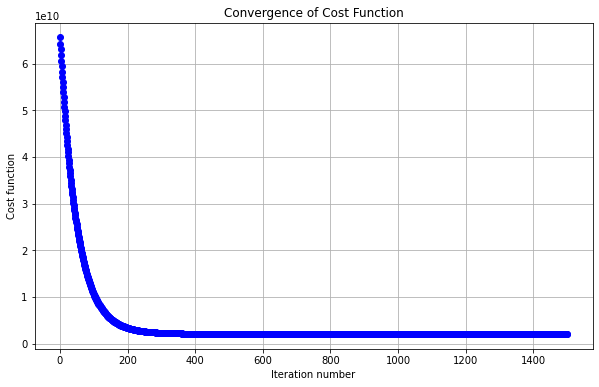

In [41]:
init_theta = np.zeros((Xcopy.shape[1],1))
theta, _, cost_vector = gradientDescent(Xcopy, init_theta)

plotCostConv(cost_vector)

Test to see results

In [44]:
ytest = np.array([1570., 2.])
print('How much is the cost of a house with 1570 square feet and 2 bedrooms?')
ytest_scaled = [(ytest[i] - save_mean[i+1]) / save_std[i+1] for i in range(len(ytest))]
ytest_scaled.insert(0, 1) #for the 0th feature

print(f"{float(hypothesis(theta, ytest_scaled))}$")

How much is the cost of a house with 1570 square feet and 2 bedrooms?
290606.168694034$


We can also calculate the theta coefficients analytically if the dataset is small enough, say around 10 - 1000 features



In [46]:
from numpy.linalg import inv, pinv

def normalEquation(X, y):
  return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)


print('How much is the cost of a house with 1570 square feet and 2 bedrooms?')

print(f"{hypothesis(normalEquation(X,y), [1,1570.,2.])}")

How much is the cost of a house with 1570 square feet and 2 bedrooms?
[290682.62952581]
